# Технологии анализа данных на Python

Импортируем датасет

Так как наш датасет разбит на 2 отдельных датасета, соединим их и добавим столбец с типом вина - red или white.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dsredwine = pd.read_csv("winequality-red.csv", delimiter =";").drop_duplicates()
dsredwine["type"] = list("red" for i in range(len(dsredwine)))

dswhitewine = pd.read_csv("winequality-white.csv", delimiter =";").drop_duplicates()
dswhitewine["type"] = list("white" for i in range(len(dswhitewine)))

## Анализ датасета

Общая информация из датасетов:

In [ ]:
dsredwine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
 12  type                  1359 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 148.6+ KB


In [ ]:
dswhitewine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3961 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3961 non-null   float64
 1   volatile acidity      3961 non-null   float64
 2   citric acid           3961 non-null   float64
 3   residual sugar        3961 non-null   float64
 4   chlorides             3961 non-null   float64
 5   free sulfur dioxide   3961 non-null   float64
 6   total sulfur dioxide  3961 non-null   float64
 7   density               3961 non-null   float64
 8   pH                    3961 non-null   float64
 9   sulphates             3961 non-null   float64
 10  alcohol               3961 non-null   float64
 11  quality               3961 non-null   int64  
 12  type                  3961 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 433.2+ KB


Выберем 1000 из всего объема данных, предварительно соединив 2 датасета в один.

In [ ]:
dswine = pd.merge(dswhitewine.iloc[0:500], dsredwine.iloc[0:500], how="outer")

dswine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10.2,0.24,0.49,2.4,0.075,10.0,28.0,0.9978,3.14,0.61,10.4,5,red
996,10.5,0.59,0.49,2.1,0.070,14.0,47.0,0.9991,3.30,0.56,9.6,4,red
997,10.6,0.34,0.49,3.2,0.078,20.0,78.0,0.9992,3.19,0.70,10.0,6,red
998,12.3,0.27,0.49,3.1,0.079,28.0,46.0,0.9993,3.20,0.80,10.2,6,red


Построим описательную статистику датасета

In [ ]:
dswine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,7.82110,0.408420,0.328150,4.349600,0.071622,25.645000,97.915500,0.995845,3.248570,0.594880,10.174900,5.684000
std,1.79846,0.187842,0.173478,4.106972,0.052165,17.490351,61.262478,0.002792,0.156209,0.191748,1.049877,0.841934
min,4.60000,0.100000,0.000000,0.800000,0.020000,1.000000,8.000000,0.989200,2.740000,0.270000,8.400000,3.000000
25%,6.70000,0.260000,0.230000,1.800000,0.045000,11.000000,42.000000,0.993700,3.147500,0.480000,9.400000,5.000000
50%,7.30000,0.360000,0.320000,2.400000,0.063000,22.000000,96.000000,0.996400,3.240000,0.560000,9.900000,6.000000
75%,8.40000,0.540000,0.440000,5.225000,0.084000,37.000000,146.000000,0.997800,3.350000,0.670000,10.800000,6.000000
max,15.60000,1.330000,1.000000,22.000000,0.611000,131.000000,313.000000,1.003200,3.900000,2.000000,14.000000,8.000000


Посмотрим на распределение данных

<Axes: >

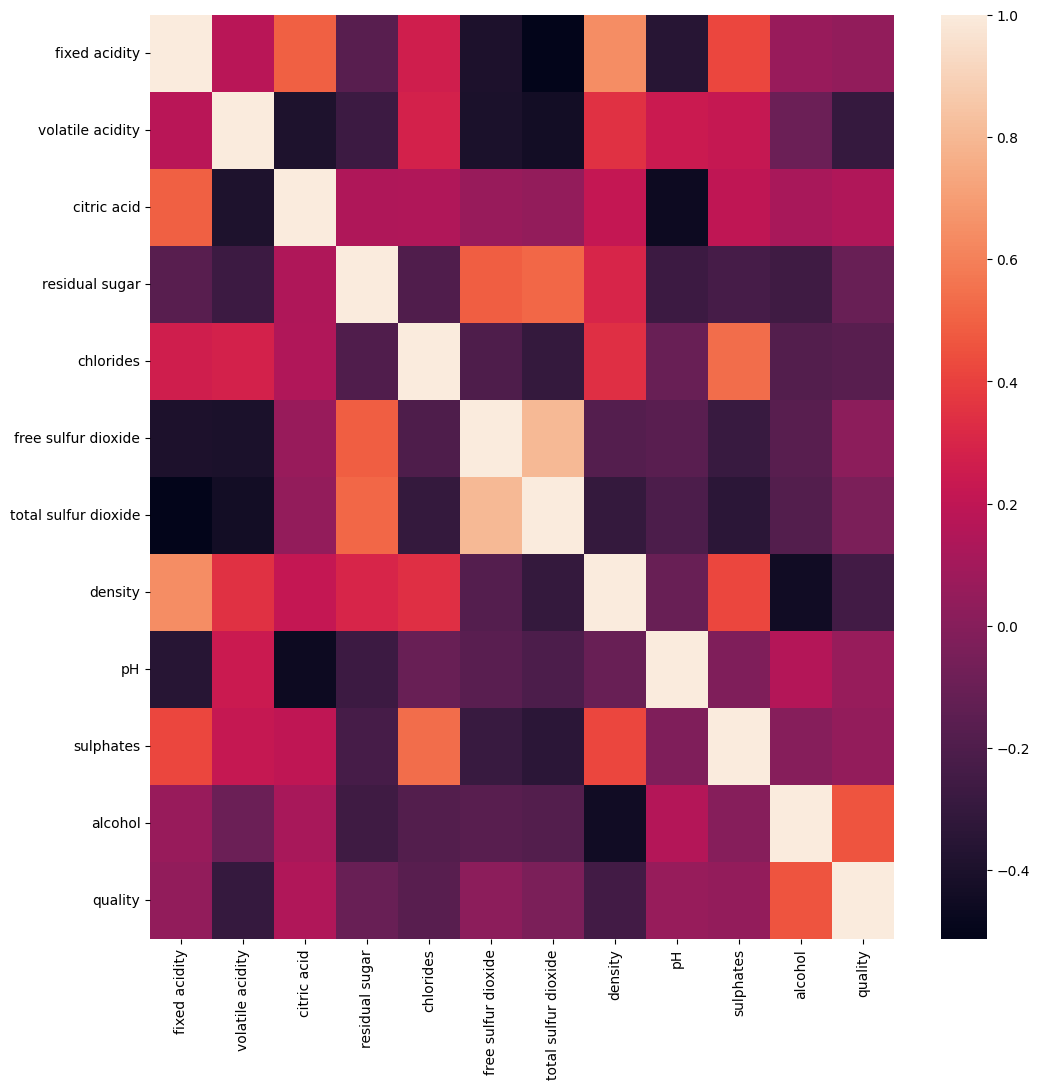

In [ ]:
numeric_cols = ["fixed acidity",
"volatile acidity",
"citric acid",
"residual sugar",
"chlorides",
"free sulfur dioxide",
"total sulfur dioxide",
"density",
"pH",
"sulphates",
"alcohol",
"quality"
]

df_numeric = dswine[numeric_cols].dropna()

ax, fig = plt.subplots(figsize=[12,12])
sns.heatmap(df_numeric.corr())

В этой таблице мы не можем наблюдать прямой корелляции между какими-то разными признаками (нету повторяющейся последовательности цветов в двух разных столбцах).

Раз повторяющихся столбцов нету, мы не будем ничего удалять.

Построим графики зависимостей целевого признака - качества (quality) от признаков free sulfur dioxide, chlorides, free sulfur dioxide.

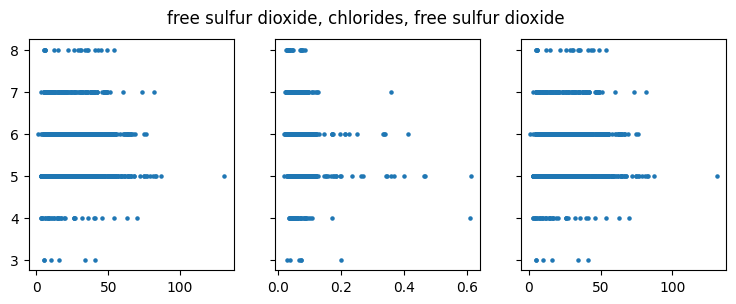

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].scatter(dswine['free sulfur dioxide'], dswine["quality"], s = 5)
axs[1].scatter(dswine['chlorides'], dswine["quality"], s = 5)
axs[2].scatter(dswine['free sulfur dioxide'], dswine["quality"], s = 5)


fig.suptitle('free sulfur dioxide, chlorides, free sulfur dioxide')
plt.show()

Посмотрим на количество пропусков в данных

In [ ]:
dswine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

В нашем датасете мы не наблюдаем пропусков данных, поэтому не будем ничего менять.


В нашем датасете есть один категориальный признак - type, прибегнем к one-hot кодированию чтобы избежать типа float в нашем наборе данных.

In [ ]:
!pip install category-encoders 
# строку выше выполнить однажды, если вы исполняете код в google colab

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 1.9 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce
encoder=ce.OneHotEncoder(cols='type',handle_unknown='return_nan',return_df=True,use_cat_names=True)
dswine_encoded = encoder.fit_transform(dswine)
dswine_encoded.to_csv("dswine_encoded.csv", index=False)
dswine_encoded

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white,type_red
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1.0,0.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1.0,0.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1.0,0.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1.0,0.0
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10.2,0.24,0.49,2.4,0.075,10.0,28.0,0.9978,3.14,0.61,10.4,5,0.0,1.0
996,10.5,0.59,0.49,2.1,0.070,14.0,47.0,0.9991,3.30,0.56,9.6,4,0.0,1.0
997,10.6,0.34,0.49,3.2,0.078,20.0,78.0,0.9992,3.19,0.70,10.0,6,0.0,1.0
998,12.3,0.27,0.49,3.1,0.079,28.0,46.0,0.9993,3.20,0.80,10.2,6,0.0,1.0


Предобработка завершена. Убедимся в этом.

In [ ]:
dswine_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1000 non-null   float64
 1   volatile acidity      1000 non-null   float64
 2   citric acid           1000 non-null   float64
 3   residual sugar        1000 non-null   float64
 4   chlorides             1000 non-null   float64
 5   free sulfur dioxide   1000 non-null   float64
 6   total sulfur dioxide  1000 non-null   float64
 7   density               1000 non-null   float64
 8   pH                    1000 non-null   float64
 9   sulphates             1000 non-null   float64
 10  alcohol               1000 non-null   float64
 11  quality               1000 non-null   int64  
 12  type_white            1000 non-null   float64
 13  type_red              1000 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 117.2 KB


Сохранение датасета

In [ ]:
dswine_encoded.to_csv("df_preprocessed.csv", encoding="utf-8", sep=';', index=False)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report

## Линейная регрессия с использованием регуляризаторов Ridge, Lasso



Разделяем датасет

In [ ]:
dswine = pd.read_csv("df_preprocessed.csv", delimiter =";")
y = dswine['quality']
X = dswine.drop(['quality'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

Обучим модели Lasso и Ridge с поиском лучших гиперпараметров

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt
lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np

parameters = {'alpha': np.arange(0, 1, 0.005)}
ridge_optimal = RandomizedSearchCV(Ridge(), parameters).fit(X_train, y_train) # поиск гиперпараметра
display(ridge_optimal.best_params_) # отображение гиперпараметра

ridge = Ridge(alpha = ridge_optimal.best_params_["alpha"]).fit(X_train, y_train) # обучение модели ridge с использованием гиперпараметра
y_pred = ridge.predict(X_test) # предсказания модели ridge

# метрики
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'R^2: {ridge.score(X_test, y_test)}')

{'alpha': 0.595}

MAE: 0.6671890387112621
MSE: 0.7903782058496819
R^2: 0.16441673977198257


In [ ]:
lasso_optimal = RandomizedSearchCV(Lasso(), parameters).fit(X_train, y_train) # поиск гиперпараметра
display(lasso_optimal.best_params_) # отображение гиперпараметра

lasso = Lasso(alpha = lasso_optimal.best_params_["alpha"]).fit(X_train, y_train) # обучение модели ridge с использованием гиперпараметра
y_pred = lasso.predict(X_test) # предсказания модели ridge

# метрики
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'R^2: {lasso.score(X_test, y_test)}')

{'alpha': 0.2}

MAE: 0.7314933770079121
MSE: 0.8483894704725702
R^2: 0.10308756689653231


## Деревья принятия решений

In [ ]:
dt = DecisionTreeRegressor().fit(X_train, y_train)
print(dt.score(X_test, y_test))
print(mean_absolute_error(y_test, dt.predict(X_test)))
print(mean_squared_error(y_test, dt.predict(X_test)))

-0.036050322444232785
0.68
0.98


Подберем гиперпараметры

In [ ]:
parameters = {'max_features': [5, 10, 15, 20, 25, 30, 35, 40],
              'max_depth': [1, 2, 3, 4,  5, 6,  7, 8, 9, 10, 11, 12, 13, 14, 15]}

dt_optimal = GridSearchCV(DecisionTreeRegressor(), parameters).fit(X_train, y_train)
dt_optimal.best_params_

{'max_depth': 2, 'max_features': 15}

In [ ]:
print(dt_optimal.score(X_test, y_test))
print(mean_absolute_error(y_test, dt_optimal.predict(X_test)))
print(mean_squared_error(y_test, dt_optimal.predict(X_test)))

0.12093253164154116
0.7126209615970741
0.8315099183202663


# Бэггинг и бустинг

Без гиперпараметров

In [ ]:
bag = BaggingRegressor().fit(X_train, y_train)
print(bag.score(X_test, y_test))
print(mean_absolute_error(y_test, bag.predict(X_test)))
print(mean_squared_error(y_test, bag.predict(X_test)))

0.28723966592663097
0.602
0.6741999999999999


In [ ]:
gb = GradientBoostingRegressor().fit(X_train, y_train)
print(gb.score(X_test, y_test))
print(mean_absolute_error(y_test, gb.predict(X_test)))
print(mean_squared_error(y_test, gb.predict(X_test)))

0.2667181016146023
0.6319532724831073
0.6936113476827478


Подберем гиперпараметры

In [ ]:
parameters = {'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40],
              'random_state': [1, 2, 3, 4]}
bag_optimal = GridSearchCV(BaggingRegressor(), parameters).fit(X_train, y_train)
bag_optimal.best_params_

{'n_estimators': 40, 'random_state': 1}

In [ ]:
print(bag_optimal.score(X_test, y_test))
print(mean_absolute_error(y_test, bag_optimal.predict(X_test)))
print(mean_squared_error(y_test, bag_optimal.predict(X_test)))

0.29094645311343703
0.6042500000000001
0.6706937500000001


In [ ]:
parameters = {'n_estimators': [ 75, 100, 200]}
gb_optimal = GridSearchCV(GradientBoostingRegressor(), parameters).fit(X_train, y_train)
gb_optimal.best_params_

{'n_estimators': 100}

In [ ]:
print(gb_optimal.score(X_test, y_test))
print(mean_absolute_error(y_test, gb_optimal.predict(X_test)))
print(mean_squared_error(y_test, gb_optimal.predict(X_test)))

0.2672562752081731
0.6316223932208297
0.6931022892805891


# Полносвязная нейронная сеть


In [ ]:
X_regression_train, X_regression_test, y_regression_train, y_regression_test = train_test_split(X, y, test_size=0.2)

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
model_regression = tf.keras.Sequential(
    [
        # Dense - полносвязный слой (каждый нейрон следующего слоя связан со всеми нейронами предыдущего)
        tf.keras.layers.Dense(64, activation="relu", input_shape=(13,)),
        # на втором скрытом слое будет 32 нейрона
        tf.keras.layers.Dense(32, activation="linear"),
        # Dropout позволяет внести фактор случайности - при обучении часть нейронов будет отключаться
        # каждый нейрон, в данном случае, будет отключаться с вероятностью 0.1
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(16, activation="relu"),
        tf.keras.layers.Dropout(0.1),
        # на выходе один нейрон
        tf.keras.layers.Dense(1, activation="linear"),
    ]
)


In [ ]:
model_regression.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,521
Trainable params: 3,521
Non-trainabl

In [ ]:
model_regression.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), loss="mse")

In [ ]:
model_regression.fit(X_regression_train, y_regression_train, epochs=10, verbose=None)

In [ ]:
print(mean_absolute_error(y_regression_test, model_regression.predict(X_regression_test, verbose=None)))
print(mean_squared_error(y_regression_test, model_regression.predict(X_regression_test, verbose=None)))
print(r2_score(y_regression_test, model_regression.predict(X_regression_test, verbose=None)))


0.739794225692749
0.8885181680708024
-0.16180336448079813


In [ ]:
model_regression = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(64, activation="relu", input_shape=(13,)),
        tf.keras.layers.Dense(128, activation="linear"),
        tf.keras.layers.Dropout(0.05),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dropout(0.025),
        tf.keras.layers.Dense(128, activation="linear"),
        tf.keras.layers.Dropout(0.05),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(32, activation="linear"),
        # на выходе один нейрон
        tf.keras.layers.Dense(1, activation="linear"),
    ]
)
model_regression.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss="mse")
model_regression.fit(X_regression_train, y_regression_train, epochs=100, verbose=None)



In [ ]:
y_pred = model_regression.predict(X_regression_test, verbose=None)
print(mean_absolute_error(y_regression_test, y_pred))
print(mean_squared_error(y_regression_test, y_pred))
print(r2_score(y_regression_test, y_pred))

0.6137424111366272
0.592124232108523
0.22575367642963873


Лучшая модель - GradientBoostingRegressor

In [ ]:
import pickle
from google.colab import drive
# путь к корню Google Диска будет '/content/drive/MyDrive'
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pickle.dump(gb, open('/content/drive/MyDrive/gradient_boosting.sav', 'wb'))

In [ ]:
gb_restored = pickle.load(open('/content/drive/MyDrive/gradient_boosting.sav', 'rb'))

In [ ]:


# путь до файла с предобработанными данными в формате csv
data_path = "https://drive.google.com/file/d/1m1E6nRW4Po8wG6qGKMRkiFWnL4nan8Xx/view?usp=share_link"

# путь до файла с сериализованной моделью
model_path = "https://drive.google.com/file/d/1YI_OF0JwjPoHOBQFZRK6Gs_sMWV2VK1c/view?usp=share_link"


In [ ]:
import os


id_slice = slice(32, 65)

data_file_id = data_path[id_slice]
model_file_id = model_path[id_slice]

os.system(f"wget -q -O preprocessed_data.csv https://drive.google.com/uc?id={data_file_id}")
os.system(f"wget -q -O model.pkl https://drive.google.com/uc?id={model_file_id}")

0

In [ ]:
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.2 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=39ba172a2e2cc4f52dc8a513651978a53ca8d7af947ef0aaf036febb43a29725
  Stored in directory: /root/.cache/pip/wheels/2d/f0/a8/1094fca7a7e5d0d12ff56e0c64675d72aa5cc81a5fc200e849
Successfully built validators


In [ ]:
%%writefile app.py
import pickle

import pandas as pd
import numpy as np
import streamlit as st
from sklearn.metrics import mean_squared_error
from math import sqrt
import random


def main():
    model = load_model("model.pkl")
    test_data = load_test_data("preprocessed_data.csv")
    y = test_data['quality']
    X = test_data.drop(['quality'], axis=1)
    
    page = st.sidebar.selectbox(
        "Выберите страницу",
        ["Описание задачи и данных", "Запрос к модели"]
    )

    if page == "Описание задачи и данных":
        st.title("Описание задачи и данных")
        st.write("Выберите страницу слева")

        st.header("Описание задачи")
        st.markdown("""Набор данных относится к красному и белому вариантам португальского вина «Vinho Verde». Из-за проблем с конфиденциальностью и логистикой доступны только физико-химические (входные) и органолептические (выходные) переменные (например, нет данных о сортах винограда, марке вина, продажной цене вина и т.д.).
Эти наборы данных можно рассматривать как задачи классификации или регрессии. Классы упорядочены и не сбалансированы (например, нормальных вин намного больше, чем отличных или плохих). Алгоритмы обнаружения выбросов можно использовать для определения нескольких отличных или плохих вин.""")


        st.header("Описание данных")
        st.markdown("""Предоставленные данные:
* fixed acidity – фиксированная кислотность,
* volatile acidity – летучая кислотность,
* citric acid – лимонная кислота,
* residual sugar – остаточный сахар,
* chlorides – хлориды,
* free sulfur dioxide – свободный диоксид серы,
* total sulfur dioxide – диоксид серы общий,
* density – плотность,
* pH – водородный показатель,
* sulphates – сульфаты,
* alcohol – алкоголь в вине,
* type_white - белое ли вино,
* type_red - красное ли вино,
* quality - качество.
К категориальным признакам относятся:
* признаки типа вина принимают значение 1 или 0 в зависимости от того, к какому типу принадлежит вино;
* качество вина оценивается от 0 до 10, где 0 это супер плохо, а 10 это идеальное;
К бинарным признакам относятся:
* признаки типа вина принимают значение 1 или 0 в зависимости от того, к какому типу принадлежит вино;
К вещественным признакам относятся:
* фиксированная кислотность,
* летучая кислотность,
* лимонная кислота,
* остаточный сахар,
* хлориды,
* свободный диоксид серы,
* диоксид серы общий,
* плотность,
* водородный показатель,
* сульфаты,
* алкоголь в вине""")

    elif page == "Запрос к модели":
        st.title("Запрос к модели")
        st.write("Выберите страницу слева")
        request = st.selectbox(
            "Выберите запрос",
            ["RMSE", "Первые 5 предсказанных значений", "Пользовательский пример", "Пасхалка"]
        )

        if request == "RMSE":
            st.header("Корень из среднеквадратичной ошибки")
            y_pred = model.predict(X)
            rmse = sqrt(mean_squared_error(y, y_pred)) 
            st.write(f"{rmse}")
        elif request == "Первые 5 предсказанных значений":
            st.header("Первые 5 предсказанных значений")
            first_5_test = test_data.drop(labels=['quality'], axis=1).iloc[:5, :]
            first_5_pred = model.predict(first_5_test)
            for item in first_5_pred:
                st.write(f"{item:.2f}")
        elif request == "Пользовательский пример":
            st.header("Пользовательский пример")

            fa = st.number_input("Фиксированная кислотность", 4.6, 15.6)

            va = st.number_input("Летучая кислотность", 0.10, 1.33)

            ca = st.number_input("Лимонная кислота", 0.01, 1.00)

            rs = st.number_input("Остаточный сахар", 0.8, 22.0)

            chl = st.number_input("Хлориды", 0.02, 0.60)

            fsd = st.number_input("Свободный диоксид серы", 1.00, 131.00)

            tsd = st.number_input("Диоксид серы общий", 8.0, 313.0)

            density = st.number_input("Плотность", 0.98, 1.00)

            pH = st.number_input("Водородный показатель", 2.74, 3.9)

            sulphates = st.number_input("Сульфаты", 0.27, 2.0)

            typewine = st.selectbox("Тип вина", ['Красное', 'Белое'])
            typered = 0
            typewhite = 1
            if typewine == 'Красное':
                typered = 1
                typewhite = 0

            alcohol = st.number_input("Алкоголь", 8.4, 14.0)
            
            if st.button('Предсказать'):
                data = [fa, va, ca, rs, chl, fsd, tsd, density, pH, sulphates, alcohol, typewhite, typered]
                data = np.array(data).reshape((1, -1))
                pred = model.predict(data)
                st.write(f"Предсказанное значение: {pred[0]:.2f}")
            else:
                pass

        elif request == "Пасхалка":
            st.header("Пасхалка")
            st.write(":)")


@st.cache_data
def load_model(path_to_file):
    with open(path_to_file, 'rb') as model_file:
        model = pickle.load(model_file)
    return model


@st.cache_data
def load_test_data(path_to_file):
    df = pd.read_csv(path_to_file, sep=";")

    return df


if __name__ == "__main__":
    main()

Writing app.py


In [ ]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 2.715s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities



In [ ]:
!streamlit run /content/app.py &>/content/logs.txt &

In [ ]:
!npx localtunnel --port 8501

# https://github.com/ievitskiy/streamlitTAD
# https://ievitskiy-streamlittad-app-sorr20.streamlit.app/

npx: installed 22 in 2.144s


In [ ]:
dff = pd.read_csv("preprocessed_data.csv", sep=";")
dff